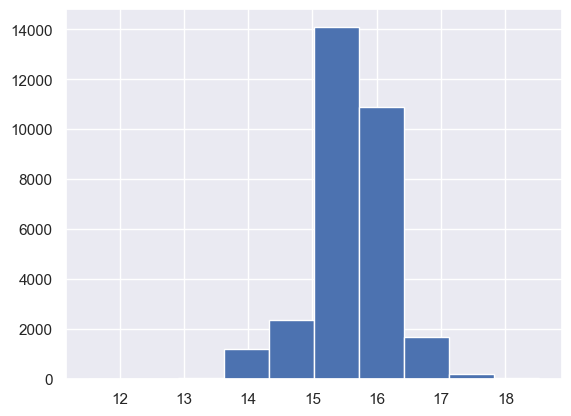

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

%matplotlib inline

data = pd.read_csv('../../data/data_flats2.csv', sep =';')
data.head()

#data.price_doc.hist();

data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();



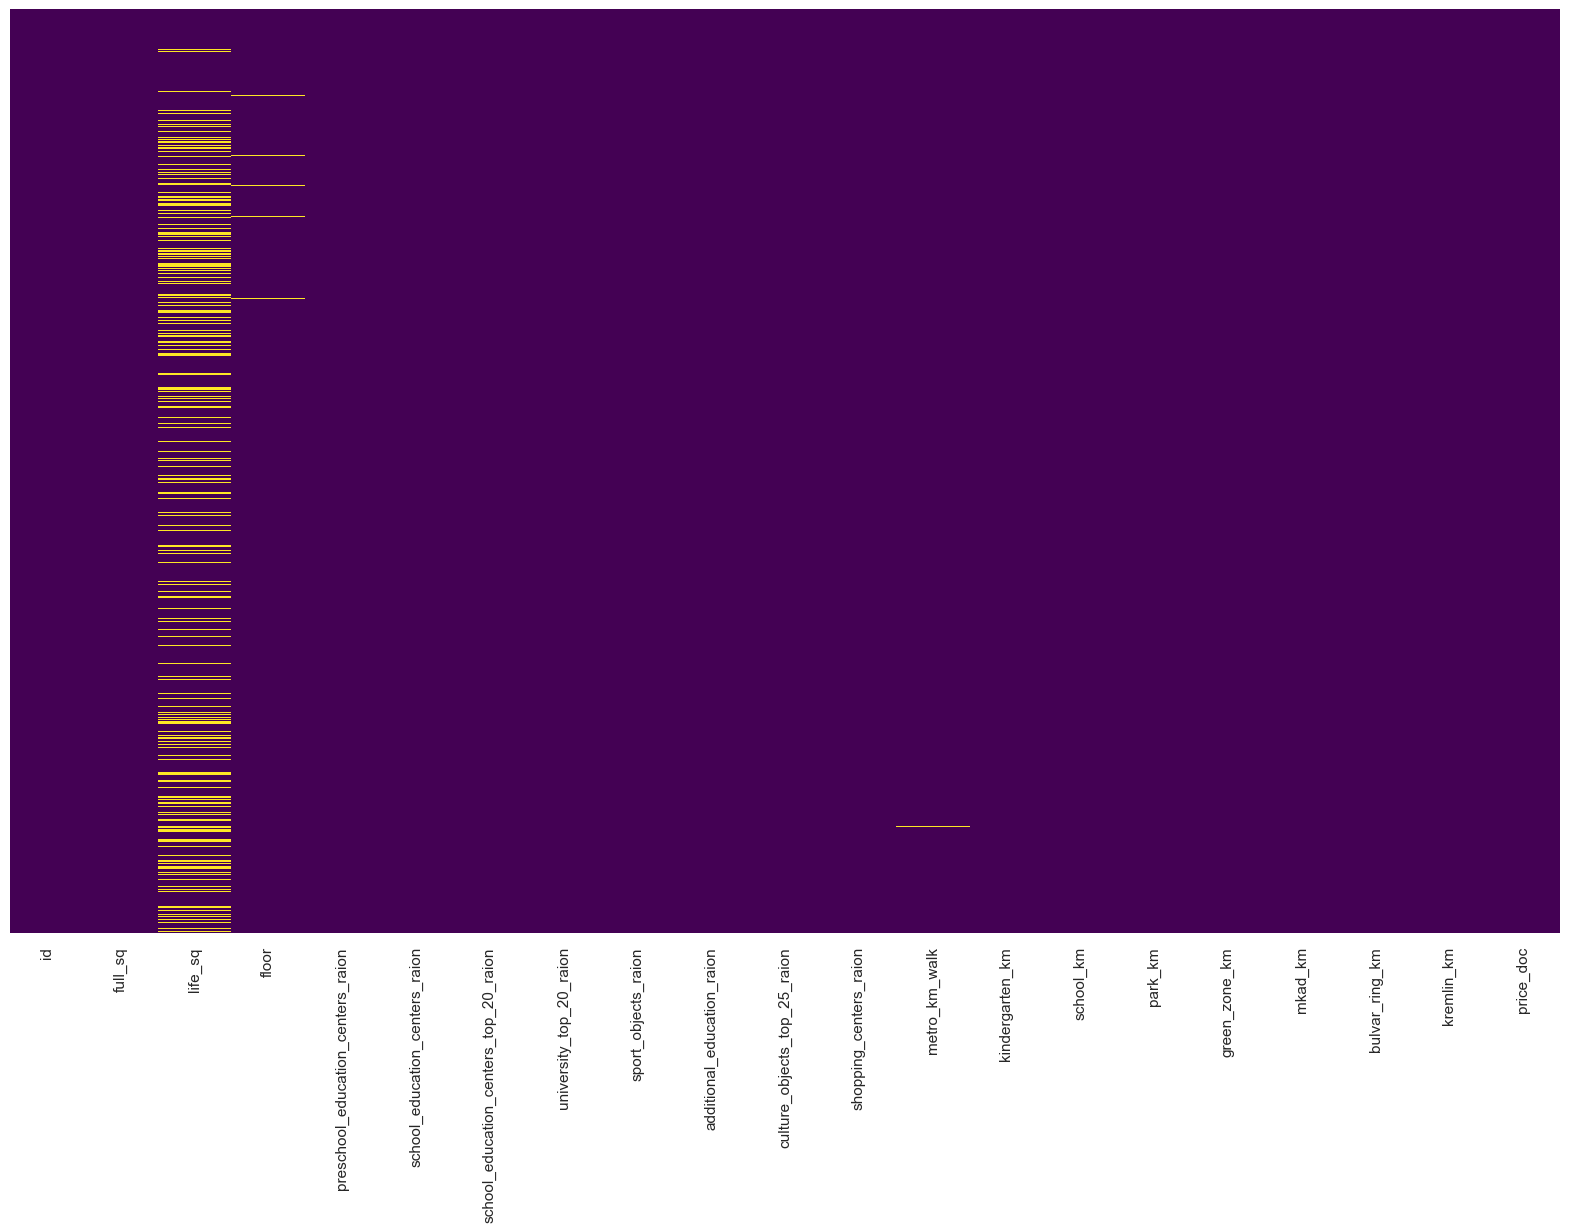

In [107]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

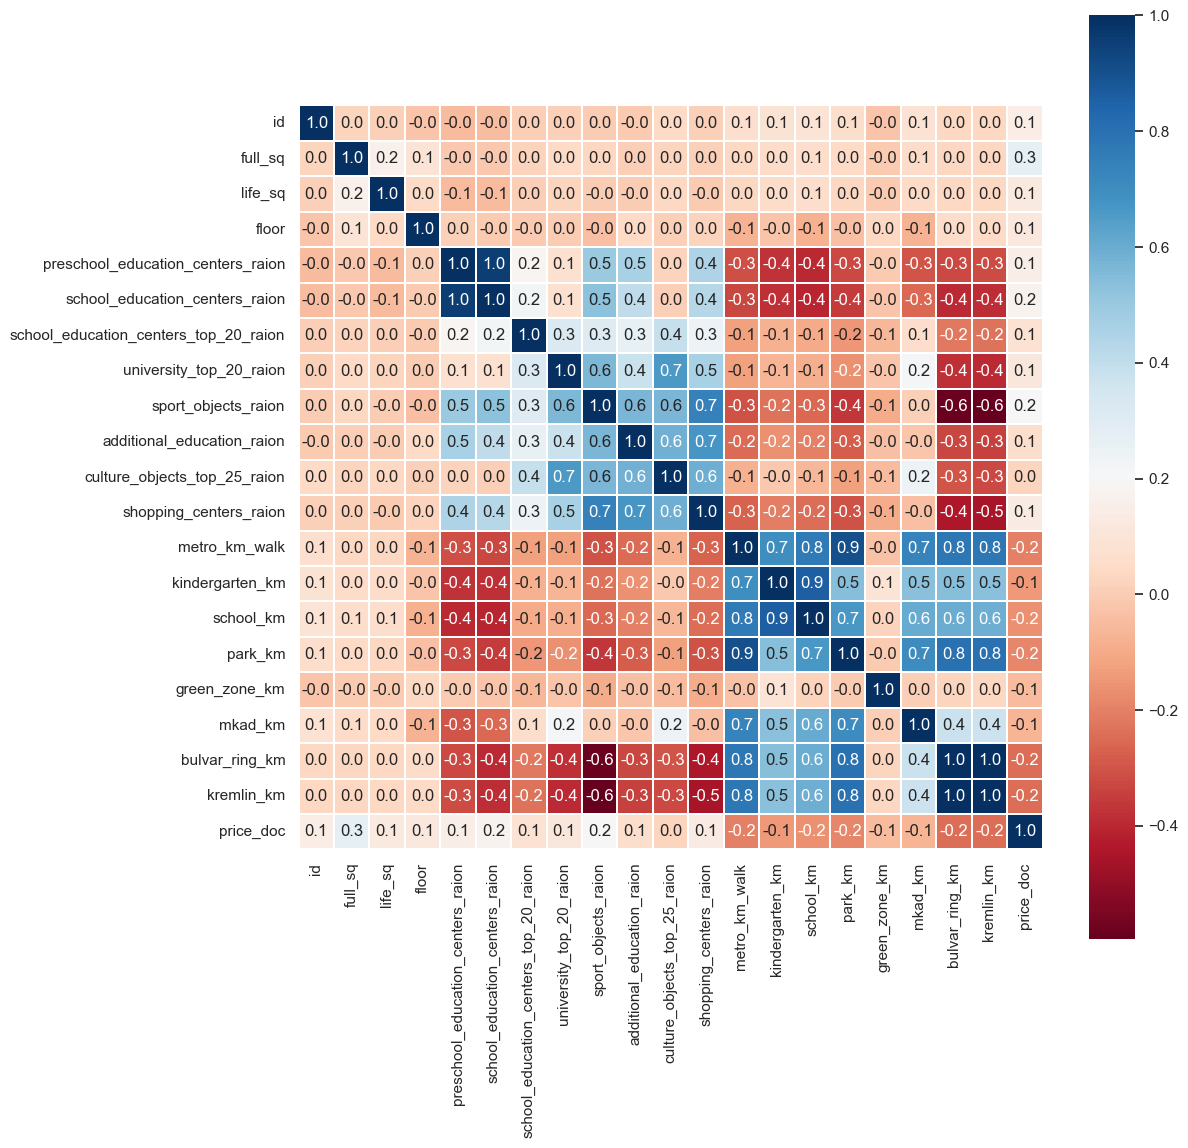

In [108]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True, annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

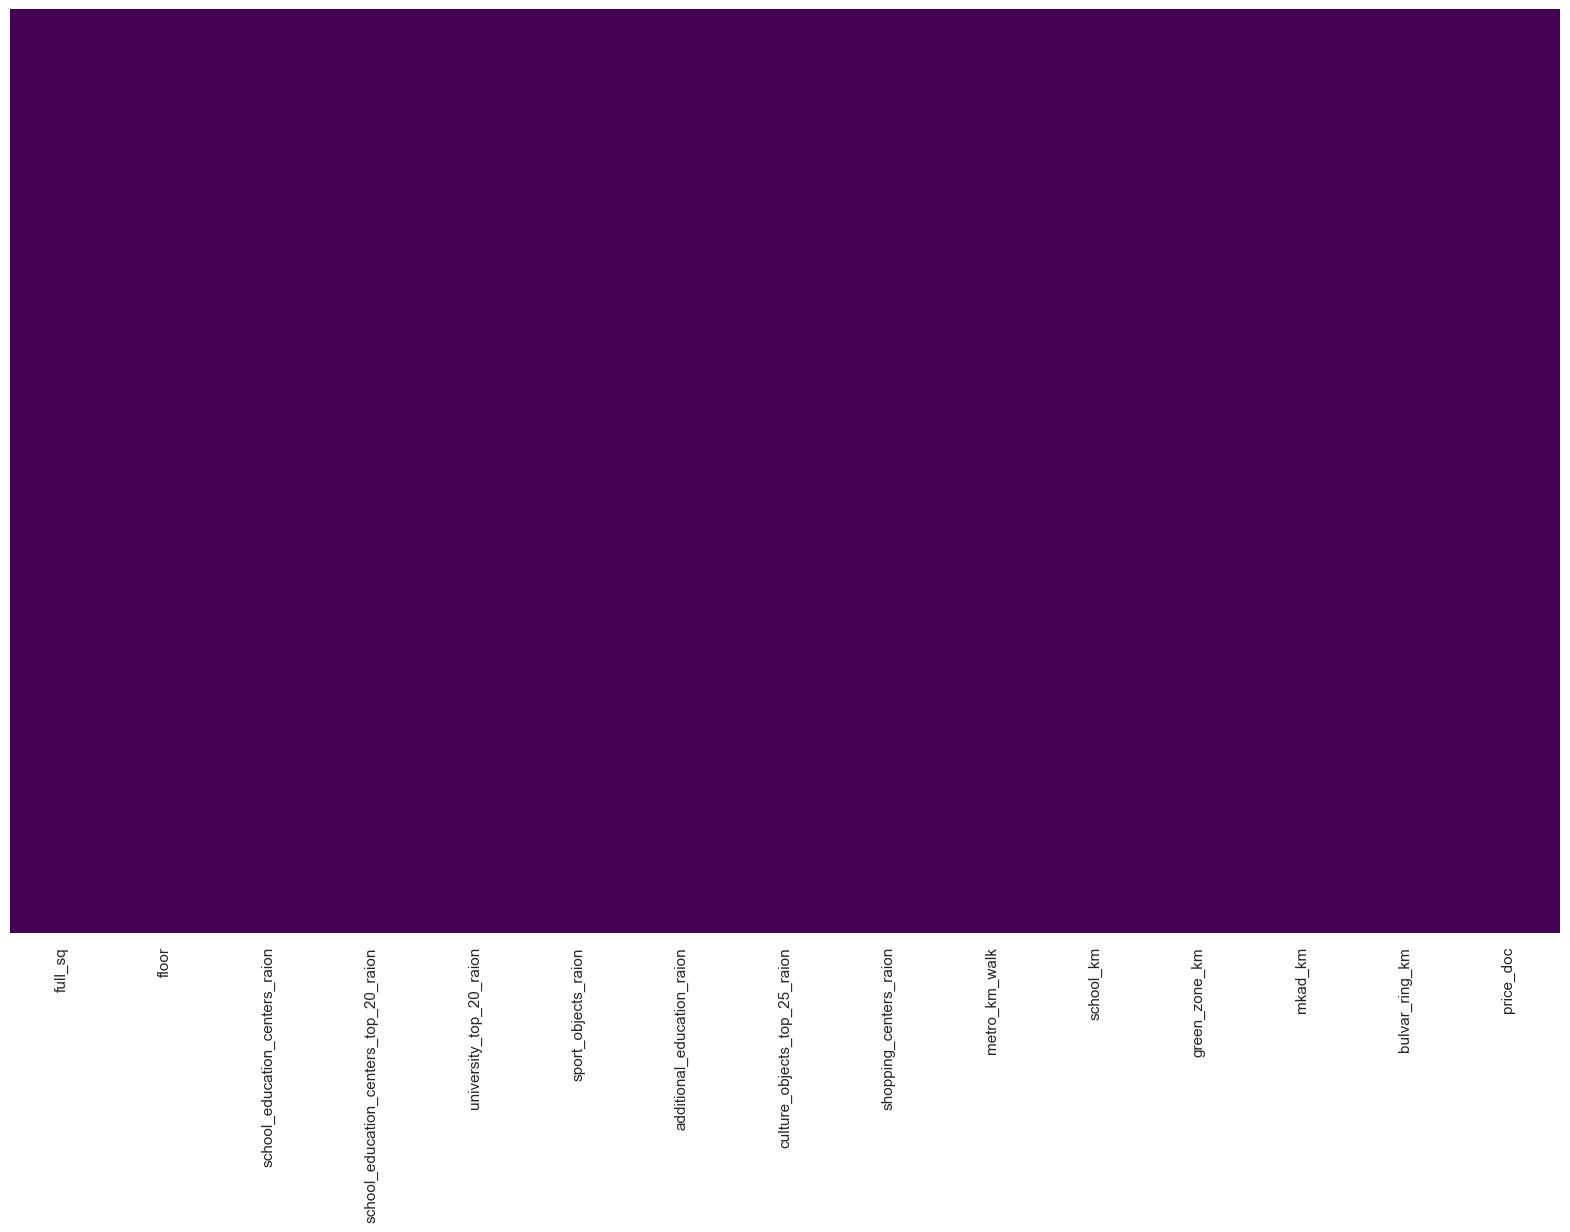

In [109]:
#data.info()
data_mod = data.drop(columns=['id', 'life_sq', 'park_km', 'kremlin_km', 'kindergarten_km', 'preschool_education_centers_raion'])
data_mod.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data_mod.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [110]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, Y_train, Y_test = train_test_split(data_mod.drop(['price_doc'], axis=1), data_mod['price_doc'], test_size= 0.2, random_state=77)

scaler = preprocessing.RobustScaler()
X_train_rs = scaler.fit_transform(X_train)
X_test_rs = scaler.transform(X_test)

In [111]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(X_train_rs,Y_train)

LinearRegression()

In [112]:
y_pred = model.predict(X_test_rs)

MSE = metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred))
print("MSE = ", MSE)


MSE =  16818684371715.049
